In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import statistics

In [225]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

## Meteorological indexes:
nao
<br>
ao
<br>
aao
<br>
pna
<br>
enso
<br>
qbo


In [330]:
nao=pd.read_csv('file:///Users/davidelibera/Library/Mobile%20Documents/com~apple~TextEdit/Documents/nao%20index%20data.txt',header=None,names=['data'])
enso=pd.read_csv('file:///Users/davidelibera/Library/Mobile%20Documents/com~apple~TextEdit/Documents/enso%20index%20data.txt',header=None,names=['data'])
aao=pd.read_csv('file:///Users/davidelibera/Library/Mobile%20Documents/com~apple~TextEdit/Documents/aao%20index%20data.txt',header=None,names=['data'])
ao=pd.read_csv('file:///Users/davidelibera/Library/Mobile%20Documents/com~apple~TextEdit/Documents/ao%20index%20data.txt',header=None,names=['data'])
pna=pd.read_csv('file:///Users/davidelibera/Library/Mobile%20Documents/com~apple~TextEdit/Documents/pna%20index%20data.txt',header=None,names=['data'])
qbo=pd.read_csv('file:///Users/davidelibera/Library/Mobile%20Documents/com~apple~TextEdit/Documents/qbo%20index%20data.txt',header=None,names=['data'])

In [331]:
nao1=nao.data.str.split(expand=True,).set_index(0).iloc[29:72]
enso1=enso.data.str.split(expand=True,).set_index(0).iloc[29:72]
aao1=aao.data.str.split(expand=True,).set_index(0).iloc[1:44]
ao1=ao.data.str.split(expand=True,).set_index(0).iloc[29:72]
pna1=pna.data.str.split(expand=True,).set_index(0).iloc[29:72]
qbo1=qbo.data.str.split(expand=True,).set_index(0)


### Temperatures data at Milano Malpensa 1965-2021


In [332]:
t1=pd.read_csv('file:///Users/davidelibera/Library/Mobile%20Documents/com~apple~TextEdit/Documents/temperatures%20malpensa%201965-2021.txt',header=None,names=['data'])

In [333]:
temperatures =t1.data.str.split(expand=True,).set_index(0).iloc[14:58]
temperatures.columns=['data']

In [334]:
list_t=temperatures['data'].tolist()


In [335]:
list_t=list(map(float, list_t)) 

In [336]:
mean=statistics.mean(np.array(list_t))
mean

12.28139534883721

In [337]:
list_t_copy=list_t.copy()

In [338]:
#assigning -1 if below avg and 1 if above avg
for i in range(0,len(list_t_copy)):
    if list_t_copy[i] < mean:
        list_t_copy[i] = -1
    elif list_t_copy[i]== mean:
        list_t_copy[i] = 0
    elif list_t_copy[i] > mean:
        list_t_copy[i] = 1

Computing the annual mean for each index

In [339]:
nao1['mean'] = nao1.astype(float).mean(axis=1)
enso1['mean'] = enso1.astype(float).mean(axis=1)
aao1['mean'] = aao1.astype(float).mean(axis=1)
ao1['mean'] = ao1.astype(float).mean(axis=1)
pna1['mean'] = pna1.astype(float).mean(axis=1)



In [340]:
indexes=[nao1['mean'].tolist(),enso1['mean'].tolist(),aao1['mean'].tolist(),ao1['mean'].tolist(),\
         pna1['mean'].tolist()]

In [341]:
df=pd.DataFrame(indexes)
df1=df.transpose()

In [342]:
df1['average temperatures']=list_t

In [343]:
df1['temperature vs average'] = list_t_copy

In [344]:
df1.columns=['nao','enso','aao','ao','pna','average temperatures','temperature vs average']

In [345]:
X=np.array(indexes).T
y=list_t


## Precipitations

In [350]:
prp1=pd.read_csv('file:///Users/davidelibera/Library/Mobile%20Documents/com~apple~TextEdit/Documents/average%20prp.txt',header=None,names=['data'])

In [351]:
prp=prp1.iloc[14:57]
list_prp=prp['data'].tolist()



In [352]:
df1['average annual precipitations'] = list_prp

In [353]:
list_prp_copy=list_prp.copy()


In [354]:
list_prp_copy=list(map(float, list_prp_copy)) 
mean=statistics.mean(np.array(list_prp_copy))
mean

1154.6593023255814

### For precipitations:
<br>
if highly above avg: 2
<br>
if above avg: 1
<br>
if near avg: 0
<br>
if below avg: -1
<br>
if highly below avg -2

In [355]:
for i in range(0,len(list_prp_copy)):
    if list_prp_copy[i]-mean>300:
        list_prp_copy[i]=+2
    elif list_prp_copy[i]-mean>100:
        list_prp_copy[i]=+1
    elif list_prp_copy[i]-mean > -100 and list_prp_copy[i]-mean < 100:
        list_prp_copy[i]=0
    elif list_prp_copy[i]-mean< -300:
        list_prp_copy[i]= -2
    elif list_prp_copy[i]-mean< -100:
        list_prp_copy[i]=-1
         
    
    

In [356]:
df1['prp vs average'] = list_prp_copy


In [357]:
df1['year'] = range(1979,2022,1)

In [358]:
df_final=df1.set_index('year')

# Complete dataset

In [360]:
df_final.head()

,nao,enso,aao,ao,pna,average temperatures,temperature vs average,average annual precipitations,prp vs average
year,,,,,,,,,
1979,0.1350,0.250833,0.578250,-0.150333,0.194167,11.0,-1,1199.69,0
1980,-0.4125,0.253333,-0.962167,-0.365167,0.250000,10.6,-1,1268.45,1
1981,-0.2125,-0.268333,-0.440083,-0.643250,0.238333,11.1,-1,1206.54,0
1982,0.4300,0.990000,0.196167,-0.434583,-0.158333,12.1,-1,1031.72,-1
1983,0.3100,0.480000,0.066583,0.297667,0.807500,11.5,-1,842.03,-2


In [194]:
y=df_final['prp vs average'].values.tolist()

In [223]:
classifier_svm=svm.SVC(kernel='linear')
lr = LogisticRegression()
nbc=GaussianNB()
model=[lr,classifier_svm,nbc]

0.1725 LogisticRegression()


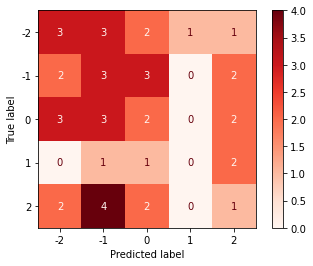

0.18222222222222223 0.16785714285714284
0.215 SVC(kernel='linear')


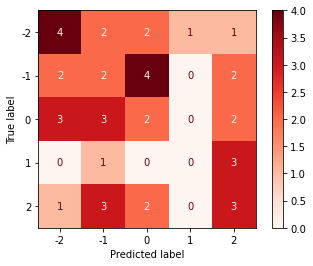

0.22666666666666668 0.2109090909090909
0.2245 GaussianNB()


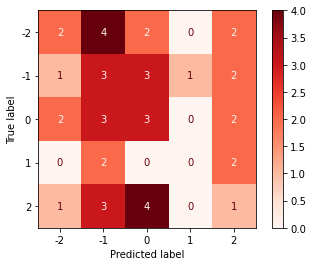

0.18222222222222223 0.17888888888888888


In [224]:
precision=[]
recall=[]
for model in model:
    y_pred=cross_val_predict(model,X, y, cv=4)
    scores=cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print(scores.astype(float).mean(),model)
    #print(y_pred,model)
    labels=[-2,-1,0,1,2]
    y_true=y
    y_pred=y_pred
    cm=confusion_matrix(y_true, y_pred,labels=labels)
    disp=ConfusionMatrixDisplay(cm,display_labels=labels)
    disp.plot(cmap=plt.cm.Reds)
    plt.show()
    recall.append(recall_score(y_true, y_pred, average=None))
    precision.append(precision_score(y_true, y_pred, average=None))
    print(statistics.mean(recall_score(y_true, y_pred, average=None)),\
      (statistics.mean(precision_score(y_true, y_pred, average=None))))

    

In [177]:
recall

[array([0.3       , 0.3       , 0.2       , 0.        , 0.11111111]),
 array([0.4       , 0.2       , 0.2       , 0.        , 0.33333333]),
 array([0.2       , 0.3       , 0.3       , 0.        , 0.11111111])]

In [138]:
y_pred

array([ 0,  2,  2, -1,  0, -1, -1, -1, -1,  2, -2, -1,  0,  0, -2, -1,  2,
       -1,  0,  2, -2, -1,  0,  0,  1, -1, -1, -1,  2,  0,  0, -2, -1,  2,
       -1,  0, -2,  2, -1, -2,  2,  0,  0])

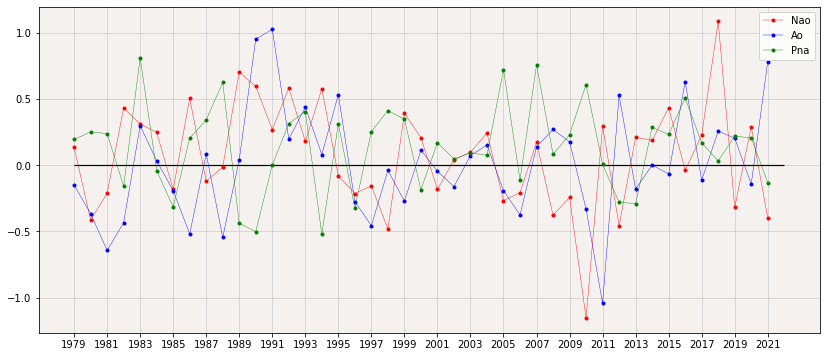

In [261]:
fig,ax = plt.subplots(figsize=(14,6))
ax.plot(df_final['nao'], marker='.', linestyle='-', linewidth = 0.4, label='Nao', color='red')
ax.plot(df_final['ao'],marker='.', linestyle='-', linewidth = 0.4, label='Ao', color='blue')
ax.plot(df_final['pna'],marker='.', linestyle='-', linewidth = 0.4, label='Pna', color='green')
plt.xticks(ticks=range(1979,2022,2))
plt.hlines(y=0, xmin=1979, xmax=2022,color='black',linewidth=1.2)
plt.grid(alpha=0.5)
plt.legend()
ax.set_facecolor('#f4f1ee')
plt.show()